# Assignment-25: CNN on CIFR

## Problem statement : CIFAR-10 Task – Object Recognition in Images

CIFAR-10 is an established computer-vision dataset used for object recognition. The CIFAR-10 data consists of 60,000 (32×32) color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. The label classes in the dataset are:

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

The classes are completely mutually exclusive. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Dataset taken from : http://www.cs.toronto.edu/~kriz/cifar.html

### Instructions
1.  Please visit this link to access the state-of-art DenseNet code for reference - DenseNet - cifar10 notebook link
2.  You need to create a copy of this and "retrain" this model to achieve 90+ test accuracy. 
3.  You cannot use Dense Layers (also called fully connected layers), or DropOut.
4.  You MUST use Image Augmentation Techniques.
5.  You cannot use an already trained model as a beginning points, you have to initilize as your own
6.  You cannot run the program for more than 300 Epochs, and it should be clear from your log, that you have only used 300 Epochs
7.  You cannot use test images for training the model.
8.  You cannot change the general architecture of DenseNet (which means you must use Dense Block, Transition and Output blocks as mentioned in the code)
9.  You are free to change Convolution types (e.g. from 3x3 normal convolution to Depthwise Separable, etc)
10. You cannot have more than 1 Million parameters in total
11. You are free to move the code from Keras to Tensorflow, Pytorch, MXNET etc. 
12. You can use any optimization algorithm you need. 
13. You can checkpoint your model and retrain the model from that checkpoint so that no need of training the model from first if you lost at any epoch while training. You can directly load that model and Train from that epoch. 

## Importing the libraries

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import tensorflow as tf
import keras
from keras import backend as K
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, AveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D , Input, Flatten, Activation
from tensorflow.keras.layers import concatenate, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import RandomNormal, he_uniform
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler, CSVLogger
from tensorflow.keras.optimizers import Adam, SGD

np.random.seed(0)
#tf.set_random_seed(0)

print("Libraries loaded")

Instructions for updating:
non-resource variables are not supported in the long term
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Libraries loaded


Using TensorFlow backend.


## 1. Loading the images

In [3]:
## Loading the images
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Train test and cv split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train)

print("Train samples:", X_train.shape, y_train.shape)
print("CV samples:", X_cv.shape, y_cv.shape)
print("Test samples:", X_test.shape, y_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
Train samples: (45000, 32, 32, 3) (45000, 1)
CV samples: (5000, 32, 32, 3) (5000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


## Distribution of the classes

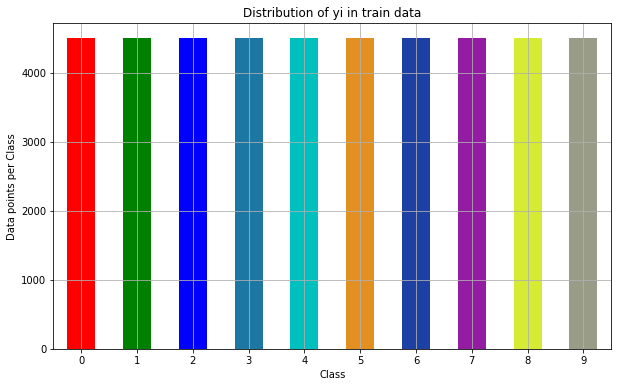

Number of data points in class 1 : 4500 ( 10.0 %)
Number of data points in class 2 : 4500 ( 10.0 %)
Number of data points in class 3 : 4500 ( 10.0 %)
Number of data points in class 4 : 4500 ( 10.0 %)
Number of data points in class 5 : 4500 ( 10.0 %)
Number of data points in class 6 : 4500 ( 10.0 %)
Number of data points in class 7 : 4500 ( 10.0 %)
Number of data points in class 8 : 4500 ( 10.0 %)
Number of data points in class 9 : 4500 ( 10.0 %)
Number of data points in class 10 : 4500 ( 10.0 %)


----------------------------------------------------------------------------------------------------


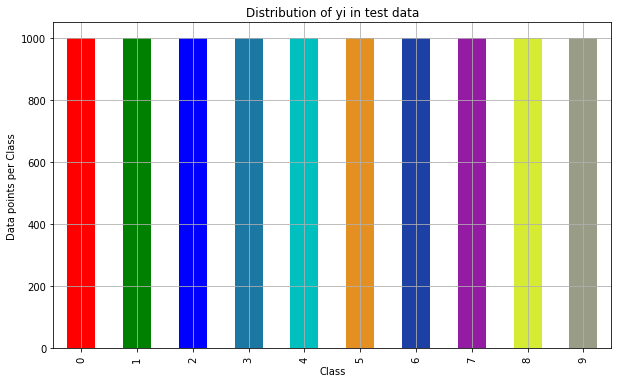

Number of data points in class 1 : 1000 ( 10.0 %)
Number of data points in class 2 : 1000 ( 10.0 %)
Number of data points in class 3 : 1000 ( 10.0 %)
Number of data points in class 4 : 1000 ( 10.0 %)
Number of data points in class 5 : 1000 ( 10.0 %)
Number of data points in class 6 : 1000 ( 10.0 %)
Number of data points in class 7 : 1000 ( 10.0 %)
Number of data points in class 8 : 1000 ( 10.0 %)
Number of data points in class 9 : 1000 ( 10.0 %)
Number of data points in class 10 : 1000 ( 10.0 %)


----------------------------------------------------------------------------------------------------


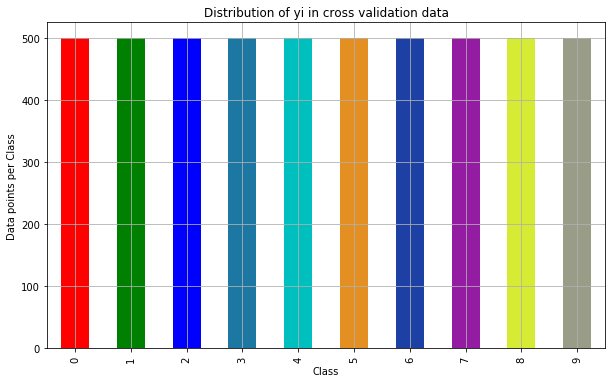

Number of data points in class 1 : 500 ( 10.0 %)
Number of data points in class 2 : 500 ( 10.0 %)
Number of data points in class 3 : 500 ( 10.0 %)
Number of data points in class 4 : 500 ( 10.0 %)
Number of data points in class 5 : 500 ( 10.0 %)
Number of data points in class 6 : 500 ( 10.0 %)
Number of data points in class 7 : 500 ( 10.0 %)
Number of data points in class 8 : 500 ( 10.0 %)
Number of data points in class 9 : 500 ( 10.0 %)
Number of data points in class 10 : 500 ( 10.0 %)


In [4]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = pd.DataFrame(y_train)[0].value_counts().sort_index()
test_class_distribution = pd.DataFrame(y_test)[0].value_counts().sort_index()
cv_class_distribution = pd.DataFrame(y_cv)[0].value_counts().sort_index()

my_colors = ["r", "g", "b", "#1c78a3", "c", "#e38f22", "#1c40a3", "#931ca3", "#d5eb34", "#999c87"]

plt.figure(figsize = (10, 6))
train_class_distribution.plot(kind='bar', color = my_colors, rot = 0)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('\n')
print('-'*100)
plt.figure(figsize = (10, 6))
test_class_distribution.plot(kind='bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('\n')
print('-'*100)
plt.figure(figsize = (10, 6))
cv_class_distribution.plot(kind='bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


## NOTE:
1. As we can see the dataset is well balanced and perfectly distributed.

## Lets try ReduceLROnPlateau with a factor of 0.25

## 2. Initial parameters

In [0]:
# Hyperparameters
num_classes = 10
epochs = 75

batch_size = 64
val_batch_size = 64

steps = len(y_train)//batch_size
val_steps = len(y_cv)//val_batch_size

l = 32                 # Length of each dense block / depth of dense-net
num_filter = 12        # Number of filters
compression = 0.5      # Rate at which the filters will compress

## 3. Showing the images

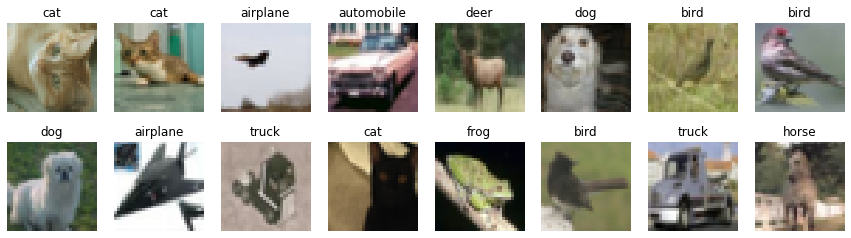

In [0]:
# show random images from train

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

cols = 8
rows = 2

fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))

for i in range(cols):
    for j in range(rows):
        random_index = int(np.random.randint(0, len(y_train)))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
        
plt.show()

## 4. Data Preparation

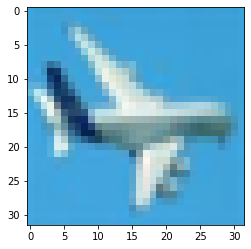

In [0]:
# Before normalizing the image
plt.imshow(X_train[20])

In [0]:
# Initializing the images parameters
img_height, img_width, channel = X_train.shape[1], X_train.shape[2], X_train.shape[3]

# Normalizing the images
X_train = X_train/255.0
X_test = X_test/255.0
X_cv = X_cv/255.0

# Convert class labels to one-hot encoded, should have shape (?, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_cv = keras.utils.to_categorical(y_cv, num_classes)

# Shape after one hot encoding
print("Train samples:", X_train.shape, y_train.shape)
print("CV samples:", X_cv.shape, y_cv.shape)
print("Test samples:", X_test.shape, y_test.shape)

Train samples: (45000, 32, 32, 3) (45000, 10)
CV samples: (5000, 32, 32, 3) (5000, 10)
Test samples: (10000, 32, 32, 3) (10000, 10)


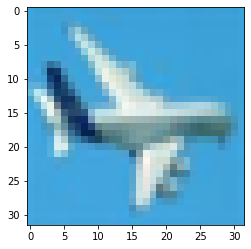

In [0]:
# After normalizing the image
plt.imshow(X_train[20])

In [0]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# MODEL ARCHITECTURE

<img src = 'https://sthalles.github.io/assets/densenets/densenet_arch_overview.png'>

A DenseNet is a stack of dense blocks followed by transition layers. Each block consists of a series of units. Each unit packs two convolutions, each preceded by Batch Normalization and ReLU activations. Besides, each unit outputs a fixed number of feature vectors. This parameter, described as the growth rate, controls how much new information the layers allow to pass through.

On the other hand, transition layers are very simple components designed to perform downsampling of the features passing the network. Every transition layer consists of a Batch Normalization layer, followed by a 1x1 convolution, followed by a 2x2 average pooling.

source : https://sthalles.github.io/densely-connected-conv-nets/

## 5. Utility fuctions to define the architecture

In [0]:
# Reference : https://github.com/Kexiii/DenseNet-Cifar10/blob/master/model/DenseNet.py

# Dense Block - To create the dense blocks
def denseblock(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Getting the images as input
    temp = img_input
    
    # Looping over entire length of the block
    for _ in range(l): 
        
        # Normalizing the layers
        BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(temp)
        # Adding the activation layer
        relu = layers.Activation('relu')(BatchNorm)
        # Adding the convolution layer 
        Conv2D_3_3 = layers.Conv2D(filters=int(num_filter*compression), 
                                   kernel_size=(3,3), 
                                   use_bias=False,
                                   padding='same', 
                                   kernel_initializer=he_uniform(),
                                   kernel_regularizer=l2(0.0001))(relu)
        
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        
        # Concatenating the layers all together
        concat = layers.Concatenate(axis=-1)([temp, Conv2D_3_3])
        
        temp = concat
        
    return temp

## ---------------------------------------------------------------------------------------------------------------

## Transition Block - Transition to the next dense block
def transition(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Normalizing the layers
    BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(img_input)
    # Adding the activation layer
    relu = layers.Activation('relu')(BatchNorm)
    # Adding the convolution layer
    Conv2D_BottleNeck = layers.Conv2D(filters=int(num_filter*compression), 
                                      kernel_size=(1,1), 
                                      use_bias=False,
                                      padding='same', 
                                      kernel_initializer=he_uniform(),
                                      kernel_regularizer=l2(0.0001))(relu)
    
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    
    # Average pooling of all the connections
    avg = layers.AveragePooling2D(pool_size=(2,2), strides=(2, 2))(Conv2D_BottleNeck)
    
    return avg

## ---------------------------------------------------------------------------------------------------------------

# Output layer
def output_layer(input):
    
    # The compression rate of the number of filters
    global compression
    
    # Normalizing the layers
    BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(input)
    
    # Convolution layer with softmax output
    conv_out = layers.Conv2D(filters=num_classes, 
                             kernel_size=(1,1), 
                             activation='softmax', 
                             use_bias=False,
                             padding='same')(BatchNorm)
    
    # Global Average pooling
    output = layers.GlobalAveragePooling2D()(conv_out)
    
    return output

## 6. Creating the Blocks -> Transitions ->Output layers

In [0]:
%%time
# Without using any dropout layers
dropout_rate = 0

# Getting the image input (32 * 32 * 3)
img_input = layers.Input(shape = (img_height, img_width, channel))

# Adding the activation layer
relu = layers.Activation('relu')(img_input)

# Creating the first convolution layer
First_Conv2D = layers.Conv2D(filters=num_filter, 
                             kernel_size=(3,3), 
                             use_bias=False, 
                             padding='same', 
                             kernel_initializer=he_uniform(),
                             kernel_regularizer=l2(0.0001))(relu)

# Repeating and creating the dense block
First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
# Making 1st transition
First_Transition = transition(First_Block, num_filter, dropout_rate)

# Repeating for 2nd block 
Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
# Making 2nd transition
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

# Repeating for 3rd block
Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
# Making 3rd transition
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

# Final block
Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
# Output layer
output = output_layer(Last_Block)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
CPU times: user 9.43 s, sys: 91.7 ms, total: 9.52 s
Wall time: 9.52 s


## Model

In [0]:
%%time
# Creating the model
model = Model(inputs=[img_input], outputs=[output])

# Determine Loss function and Optimizer
model.compile(optimizer=SGD(learning_rate=0.1,momentum=0.9,nesterov=True), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Saving the final model
model.save(base_dir + 'checkpoints/model_1.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 12)   324         activation[0][0]                 
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 12)   48          conv2d[0][0]                     
______________________________________________________________________________________________

CPU times: user 57.5 s, sys: 1.56 s, total: 59.1 s
Wall time: 1min 18s


## NOTE:
1. We are no using any dropout layers
2. We will be using image augmentation to improve the model's learning
3. We have 727,884 trainable parameters with each block length as 32

## Callbacks

In [0]:
## Reference : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau?version=stable

# Callbacks

# Instantiating tensorboard
logdir = base_dir + "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# History of the training
history = tf.keras.callbacks.History()

# Creating checkpoints
best_model = ModelCheckpoint(filepath = base_dir + 'checkpoints/best_model_weights_2.h5', 
                             monitor = 'val_acc', save_best_only=True, mode = 'max')

# Monitor learning rate
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, 
                                                               verbose=0, factor=0.25, min_lr=0.0001)

callbacks_list = [tensorboard_callback, best_model, history, learning_rate_reduction]

## Image augmentation

In [0]:
# Creating the objects
train_img_gen = ImageDataGenerator(rotation_range = 15, fill_mode='nearest', 
                                   horizontal_flip=True, zoom_range=0.3, rescale=1./255)

val_img_gen = ImageDataGenerator(rescale=1./255)
test_img_gen = ImageDataGenerator(rescale=1./255)

train_img_gen.fit(X_train)
val_img_gen.fit(X_cv)
test_img_gen.fit(X_test)

## Fitting the data in the model

In [0]:
%%time
# Sets the threshold for what messages will be logged.
old_v = tf.compat.v1.logging.get_verbosity()
# able to set the logging verbosity to either DEBUG, INFO, WARN, ERROR, or FATAL. Here its ERROR
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ---------------------------------------------------------------------------------------------------------

# # Setting the gpu
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.75)
# sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

# # Creating new session
# K.set_session(sess)

# ---------------------------------------------------------------------------------------------------------

history = model.fit_generator(generator = train_img_gen.flow(X_train, y_train, batch_size = batch_size),
                              steps_per_epoch = steps,
                              epochs = epochs,
                              callbacks = callbacks_list,
                              validation_data = val_img_gen.flow(X_cv, y_cv, batch_size = batch_size),
                              validation_steps = val_steps)

# ---------------------------------------------------------------------------------------------------------
# For warnings
tf.compat.v1.logging.set_verbosity(old_v)

Epoch 1/75
703/703 [==============================] - 185s 263ms/step - loss: 3.0948 - acc: 0.3631 - val_loss: 3.4025 - val_acc: 0.2240
Epoch 2/75
703/703 [==============================] - 146s 208ms/step - loss: 2.4920 - acc: 0.4824 - val_loss: 2.4856 - val_acc: 0.4631
Epoch 3/75
703/703 [==============================] - 144s 205ms/step - loss: 2.0821 - acc: 0.5568 - val_loss: 2.1842 - val_acc: 0.4952
Epoch 4/75
703/703 [==============================] - 141s 201ms/step - loss: 1.7732 - acc: 0.6160 - val_loss: 2.3760 - val_acc: 0.4463
Epoch 5/75
703/703 [==============================] - 143s 204ms/step - loss: 1.5586 - acc: 0.6567 - val_loss: 1.4900 - val_acc: 0.6669
Epoch 6/75
703/703 [==============================] - 144s 204ms/step - loss: 1.4076 - acc: 0.6763 - val_loss: 1.3905 - val_acc: 0.6781
Epoch 7/75
703/703 [==============================] - 143s 204ms/step - loss: 1.2965 - acc: 0.6967 - val_loss: 1.2629 - val_acc: 0.6973
Epoch 8/75
703/703 [============================

## 7. Evaluate the model

In [0]:
# Loading the model
final_model = load_model(base_dir + 'checkpoints/model_2.h5', compile=False)

# Compiling the model
final_model.compile(optimizer=SGD(learning_rate=0.1,momentum=0.9,nesterov=True), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

# Loading weights
final_model.load_weights(base_dir + 'checkpoints/best_model_weights_2.h5')

print("Created the model and loaded weights....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Created the model and loaded weights....


In [0]:
## Getting the scores of train data
score_train = final_model.evaluate_generator(train_img_gen.flow(X_train, y_train, batch_size = batch_size), 
                                             verbose=0)
print('Train Loss:', score_train[0])
print('Train Accuracy:', score_train[1])
print("-"*100)

## Getting the scores of test data
score_test = final_model.evaluate_generator(test_img_gen.flow(X_test, y_test, batch_size = batch_size), 
                                            verbose=0)
print('Test Loss:', score_test[0])
print('Test Accuracy:', score_test[1])

Train Loss: 0.5056673256172375
Train Accuracy: 0.8992889
----------------------------------------------------------------------------------------------------
Test Loss: 0.5911716304387257
Test Accuracy: 0.8727


## Learning rate graph

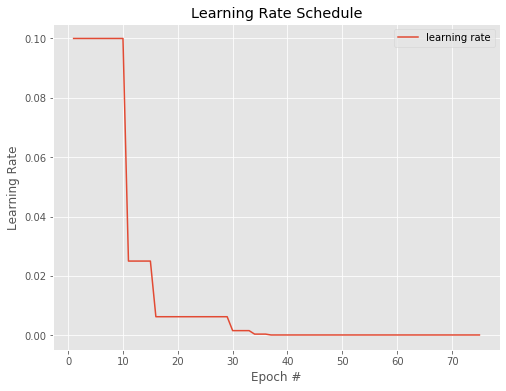

In [0]:
lrs = history.history['lr']
epoch = range(1, len(lrs) + 1)
# the learning rate schedule
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
plt.plot(epoch, lrs)
plt.title('Learning Rate Schedule')
plt.xlabel("Epoch #")
plt.legend(['learning rate'])
plt.ylabel("Learning Rate")
plt.show()

In [0]:
history.history['lr']

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.00625,
 0.0015625,
 0.0015625,
 0.0015625,
 0.0015625,
 0.000390625,
 0.000390625,
 0.000390625,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04,
 1e-04]

## Accuracy and Loss

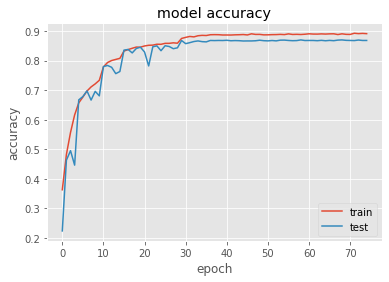

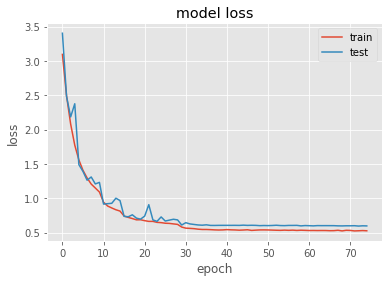

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Model Architecture

In [0]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plot model graph
plot_model(final_model, show_shapes=True, show_layer_names=True, to_file = base_dir + 'model_img/model_2.png')
Image(retina=True, filename = base_dir + 'model_img/model_2.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.557955 to fit



## NOTE:
1. With a learning rate of 0.1 and with a learning rate reducer with a factor of 0.25 we are getting 0.87 accuracy on test data.
2. If we try to change the learning rate to reduction factor to < 0.5 it might improve the accuracy.

## Lets try ReduceLROnPlateau with a factor of 0.65

## 2. Initial parameters

In [0]:
# Hyperparameters
num_classes = 10
epochs = 75

batch_size = 64
val_batch_size = 64

steps = len(y_train)//batch_size
val_steps = len(y_cv)//val_batch_size

l = 32                 # Length of each dense block / depth of dense-net
num_filter = 12        # Number of filters
compression = 0.5      # Rate at which the filters will compress

## 3. Showing the images

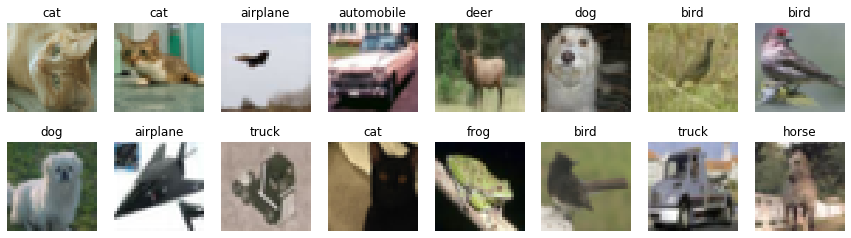

In [6]:
# show random images from train

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

cols = 8
rows = 2

fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))

for i in range(cols):
    for j in range(rows):
        random_index = int(np.random.randint(0, len(y_train)))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
        
plt.show()

## 4. Data Preparation

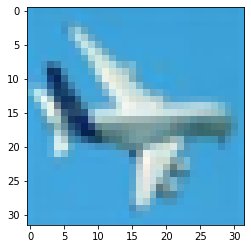

In [7]:
# Before normalizing the image
plt.imshow(X_train[20])

In [8]:
# Initializing the images parameters
img_height, img_width, channel = X_train.shape[1], X_train.shape[2], X_train.shape[3]

# Normalizing the images
X_train = X_train/255.0
X_test = X_test/255.0
X_cv = X_cv/255.0

# Convert class labels to one-hot encoded, should have shape (?, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_cv = keras.utils.to_categorical(y_cv, num_classes)

# Shape after one hot encoding
print("Train samples:", X_train.shape, y_train.shape)
print("CV samples:", X_cv.shape, y_cv.shape)
print("Test samples:", X_test.shape, y_test.shape)

Train samples: (45000, 32, 32, 3) (45000, 10)
CV samples: (5000, 32, 32, 3) (5000, 10)
Test samples: (10000, 32, 32, 3) (10000, 10)


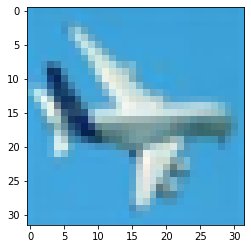

In [9]:
# After normalizing the image
plt.imshow(X_train[20])

In [10]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# MODEL ARCHITECTURE

<img src = 'https://sthalles.github.io/assets/densenets/densenet_arch_overview.png'>

A DenseNet is a stack of dense blocks followed by transition layers. Each block consists of a series of units. Each unit packs two convolutions, each preceded by Batch Normalization and ReLU activations. Besides, each unit outputs a fixed number of feature vectors. This parameter, described as the growth rate, controls how much new information the layers allow to pass through.

On the other hand, transition layers are very simple components designed to perform downsampling of the features passing the network. Every transition layer consists of a Batch Normalization layer, followed by a 1x1 convolution, followed by a 2x2 average pooling.

source : https://sthalles.github.io/densely-connected-conv-nets/

## 5. Utility fuctions to define the architecture

In [0]:
# Reference : https://github.com/Kexiii/DenseNet-Cifar10/blob/master/model/DenseNet.py

# Dense Block - To create the dense blocks
def denseblock(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Getting the images as input
    temp = img_input
    
    # Looping over entire length of the block
    for _ in range(l): 
        
        # Normalizing the layers
        BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(temp)
        # Adding the activation layer
        relu = layers.Activation('relu')(BatchNorm)
        # Adding the convolution layer 
        Conv2D_3_3 = layers.Conv2D(filters=int(num_filter*compression), 
                                   kernel_size=(3,3), 
                                   use_bias=False,
                                   padding='same', 
                                   kernel_initializer=he_uniform(),
                                   kernel_regularizer=l2(0.0001))(relu)
        
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        
        # Concatenating the layers all together
        concat = layers.Concatenate(axis=-1)([temp, Conv2D_3_3])
        
        temp = concat
        
    return temp

## ---------------------------------------------------------------------------------------------------------------

## Transition Block - Transition to the next dense block
def transition(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Normalizing the layers
    BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(img_input)
    # Adding the activation layer
    relu = layers.Activation('relu')(BatchNorm)
    # Adding the convolution layer
    Conv2D_BottleNeck = layers.Conv2D(filters=int(num_filter*compression), 
                                      kernel_size=(1,1), 
                                      use_bias=False,
                                      padding='same', 
                                      kernel_initializer=he_uniform(),
                                      kernel_regularizer=l2(0.0001))(relu)
    
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    
    # Average pooling of all the connections
    avg = layers.AveragePooling2D(pool_size=(2,2), strides=(2, 2))(Conv2D_BottleNeck)
    
    return avg

## ---------------------------------------------------------------------------------------------------------------

# Reference : https://github.com/Kexiii/DenseNet-Cifar10/blob/master/model/DenseNet.py

# Dense Block - To create the dense blocks
def denseblock(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Getting the images as input
    temp = img_input
    
    # Looping over entire length of the block
    for _ in range(l): 
        
        # Normalizing the layers
        BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(temp)
        # Adding the activation layer
        relu = layers.Activation('relu')(BatchNorm)
        # Adding the convolution layer 
        Conv2D_3_3 = layers.Conv2D(filters=int(num_filter*compression), 
                                   kernel_size=(3,3), 
                                   use_bias=False,
                                   padding='same', 
                                   kernel_initializer=he_uniform(),
                                   kernel_regularizer=l2(0.0001))(relu)
        
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        
        # Concatenating the layers all together
        concat = layers.Concatenate(axis=-1)([temp, Conv2D_3_3])
        
        temp = concat
        
    return temp

## ---------------------------------------------------------------------------------------------------------------

## Transition Block - Transition to the next dense block
def transition(img_input, num_filter = 12, dropout_rate = None):
    
    # The compression rate of the number of filters
    global compression
    
    # Normalizing the layers
    BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(img_input)
    # Adding the activation layer
    relu = layers.Activation('relu')(BatchNorm)
    # Adding the convolution layer
    Conv2D_BottleNeck = layers.Conv2D(filters=int(num_filter*compression), 
                                      kernel_size=(1,1), 
                                      use_bias=False,
                                      padding='same', 
                                      kernel_initializer=he_uniform(),
                                      kernel_regularizer=l2(0.0001))(relu)
    
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    
    # Average pooling of all the connections
    avg = layers.AveragePooling2D(pool_size=(2,2), strides=(2, 2))(Conv2D_BottleNeck)
    
    return avg

## ---------------------------------------------------------------------------------------------------------------

# Output layer
def output_layer(input):
    
    # The compression rate of the number of filters
    global compression
    
    # Normalizing the layers
    BatchNorm = layers.BatchNormalization(gamma_regularizer=l2(0.0001), beta_regularizer=l2(0.0001))(input)
    
    # Convolution layer with softmax output
    conv_out = layers.Conv2D(filters=num_classes, 
                             kernel_size=(1,1), 
                             activation='softmax', 
                             use_bias=False,
                             padding='same')(BatchNorm)
    
    # Global Average pooling
    output = layers.GlobalAveragePooling2D()(conv_out)
    
    return output

## 6. Creating the Blocks -> Transitions ->Output layers

In [11]:
%%time
# Without using any dropout layers
dropout_rate = 0

# Getting the image input (32 * 32 * 3)
img_input = layers.Input(shape = (img_height, img_width, channel))

# Adding the activation layer
relu = layers.Activation('relu')(img_input)

# Creating the first convolution layer
First_Conv2D = layers.Conv2D(filters=num_filter, 
                             kernel_size=(3,3), 
                             use_bias=False, 
                             padding='same', 
                             kernel_initializer=he_uniform(),
                             kernel_regularizer=l2(0.0001))(relu)

# Repeating and creating the dense block
First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
# Making 1st transition
First_Transition = transition(First_Block, num_filter, dropout_rate)

# Repeating for 2nd block 
Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
# Making 2nd transition
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

# Repeating for 3rd block
Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
# Making 3rd transition
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

# Final block
Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
# Output layer
output = output_layer(Last_Block)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
CPU times: user 9.31 s, sys: 36.7 ms, total: 9.35 s
Wall time: 9.41 s


## Model

In [12]:
%%time
# Creating the model
model = Model(inputs=[img_input], outputs=[output])

# Determine Loss function and Optimizer
model.compile(optimizer=SGD(learning_rate=0.1,momentum=0.9,nesterov=True), 
              loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Saving the final model
model.save(base_dir + 'checkpoints/model_2.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 12)   324         activation[0][0]                 
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 12)   48          conv2d[0][0]                     
______________________________________________________________________________________________

## NOTE:
1. We are no using any dropout layers
2. We will be using image augmentation to improve the model's learning
3. We have 727,884 trainable parameters with each block length as 32

## Callbacks

In [0]:
## Reference : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau?version=stable

# Callbacks

# Instantiating tensorboard
logdir = base_dir + "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

# History of the training
history = tf.keras.callbacks.History()

# Creating checkpoints
best_model = ModelCheckpoint(filepath = base_dir + 'checkpoints/best_model_weights_2.h5', 
                             monitor = 'val_acc', save_best_only=True, mode = 'max')

# CSVLogger for history
csv_logger = CSVLogger(base_dir + 'logs/history.csv')

# Monitor learning rate
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3, 
                                                               verbose=0, factor=0.65, min_lr=0.0001)

callbacks_list = [tensorboard_callback, best_model, history, learning_rate_reduction, csv_logger]

## Image augmentation

In [0]:
# Creating the objects
train_img_gen = ImageDataGenerator(rotation_range = 15, fill_mode='nearest', 
                                   horizontal_flip=True, zoom_range=0.3, rescale=1./255)

val_img_gen = ImageDataGenerator(rescale=1./255)
test_img_gen = ImageDataGenerator(rescale=1./255)

train_img_gen.fit(X_train)
val_img_gen.fit(X_cv)
test_img_gen.fit(X_test)

## Fitting the data in the model

In [15]:
%%time
# Sets the threshold for what messages will be logged.
old_v = tf.compat.v1.logging.get_verbosity()
# able to set the logging verbosity to either DEBUG, INFO, WARN, ERROR, or FATAL. Here its ERROR
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ---------------------------------------------------------------------------------------------------------

# # Setting the gpu
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.75)
# sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

# # Creating new session
# K.set_session(sess)

# ---------------------------------------------------------------------------------------------------------

history = model.fit_generator(generator = train_img_gen.flow(X_train, y_train, batch_size = batch_size),
                              steps_per_epoch = steps,
                              epochs = epochs,
                              callbacks = callbacks_list,
                              validation_data = val_img_gen.flow(X_cv, y_cv, batch_size = batch_size),
                              validation_steps = val_steps)

# ---------------------------------------------------------------------------------------------------------
# For warnings
tf.compat.v1.logging.set_verbosity(old_v)

Epoch 1/75
703/703 [==============================] - 217s 309ms/step - loss: 3.2136 - acc: 0.3264 - val_loss: 3.4613 - val_acc: 0.2196
Epoch 2/75
703/703 [==============================] - 168s 239ms/step - loss: 2.6222 - acc: 0.4327 - val_loss: 2.8252 - val_acc: 0.3167
Epoch 3/75
703/703 [==============================] - 165s 234ms/step - loss: 2.2065 - acc: 0.5113 - val_loss: 2.6056 - val_acc: 0.3754
Epoch 4/75
703/703 [==============================] - 162s 231ms/step - loss: 1.9080 - acc: 0.5612 - val_loss: 2.6052 - val_acc: 0.3564
Epoch 5/75
703/703 [==============================] - 164s 233ms/step - loss: 1.6888 - acc: 0.5989 - val_loss: 2.5752 - val_acc: 0.3896
Epoch 6/75
703/703 [==============================] - 165s 235ms/step - loss: 1.5117 - acc: 0.6335 - val_loss: 1.6224 - val_acc: 0.5761
Epoch 7/75
703/703 [==============================] - 162s 231ms/step - loss: 1.3818 - acc: 0.6591 - val_loss: 2.3983 - val_acc: 0.3522
Epoch 8/75
703/703 [============================

## 7. Evaluate the model

In [11]:
# Loading the model
final_model = load_model(base_dir + 'checkpoints/model_2.h5', compile=False)

# Compiling the model
final_model.compile(optimizer=SGD(learning_rate=0.1,momentum=0.9,nesterov=True), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

# Loading weights
final_model.load_weights(base_dir + 'checkpoints/best_model_weights_2.h5')

print("Created the model and loaded weights....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Created the model and loaded weights....


In [14]:
## Getting the scores of train data
score_train = final_model.evaluate_generator(train_img_gen.flow(X_train, y_train, batch_size = batch_size), 
                                             verbose=0)
print('Train Loss:', score_train[0])
print('Train Accuracy:', score_train[1])
print("-"*100)

## Getting the scores of test data
score_test = final_model.evaluate_generator(test_img_gen.flow(X_test, y_test, batch_size = batch_size), 
                                            verbose=0)
print('Test Loss:', score_test[0])
print('Test Accuracy:', score_test[1])

Train Loss: 0.32067363666878507
Train Accuracy: 0.9422889
----------------------------------------------------------------------------------------------------
Test Loss: 0.4443678589193684
Test Accuracy: 0.9057


## CONCLUSION

__1. The network length with each block l>30 gives better results than l<30__


__2. As we can see from the above graphs, the learning rate plays a major role in increasing the accuracy of the model__


__3. When we got the constant learning rate the model's accuracy didn't improve (with ReduceOnPlateau(factor=0.25)) but as soon as we changed the factor and the learning rate started to decrease slower we got a better accuracy.__


__4. I tried with ADAM optimizer but it seems (as per the research paper) SGD works better in DenseNet architecture.__


__5. I tried different Image Augmentation but only these 4 worked very well.__

    - Rotation, Fill, Flip, Zoom

__6. I have used kernel Initializers so that the weights can be controlled. I have used L2 regularizer as well.__

__7. For the batch_normalization layer I regularized it with gama_regularization and beta_regularization to get more accuracy.__

__8. Instead of doing Average pooling, I tied global pooling and it really worked better than avg pooling.__

__9. I noticed that while I was using a higher batch size the model performance was not increasing instead it was constant for some time.__